In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.affinity import rotate
import numpy as np

from tile_units import TileUnit
from tile_map import Tiling

In [2]:
ak = geopandas.read_file("../data/imd-auckland-2018.gpkg")

# Octagons (4.8.8)

In [3]:
d = 300
tile_unit = TileUnit(spacing = d, crs = ak.crs)

<AxesSubplot:>

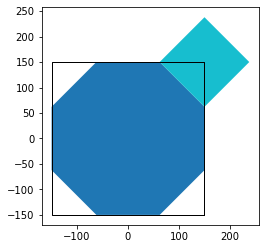

In [4]:
R = d / 2 / np.cos(np.pi / 8)
angles = [np.pi / 8 + a * np.pi / 4 for a in range(8)]

octagon = Polygon([(R * np.cos(a), R * np.sin(a)) for a in angles])
A = Point(octagon.exterior.coords[0])
B = Point(octagon.exterior.coords[1])
C = rotate(A, 180, origin = (A.x, B.y))
D = rotate(B, 180, origin = (A.x, B.y))
square = Polygon([A, B, C, D])

elements = geopandas.GeoDataFrame(
    data = {"element_id": list("ab")}, crs = ak.crs,
    geometry = geopandas.GeoSeries([octagon, square])
)

tile_unit.elements = elements

ax = tile_unit.elements.plot(column = "element_id")
tile_unit.tile.plot(ax = ax, edgecolor = "k", facecolor = "#00000000")

In [7]:
tiling = Tiling(tile_unit, ak, id_var = "DZ2018")
t = tiling.get_tiled_map(prioritise_tiles = True)

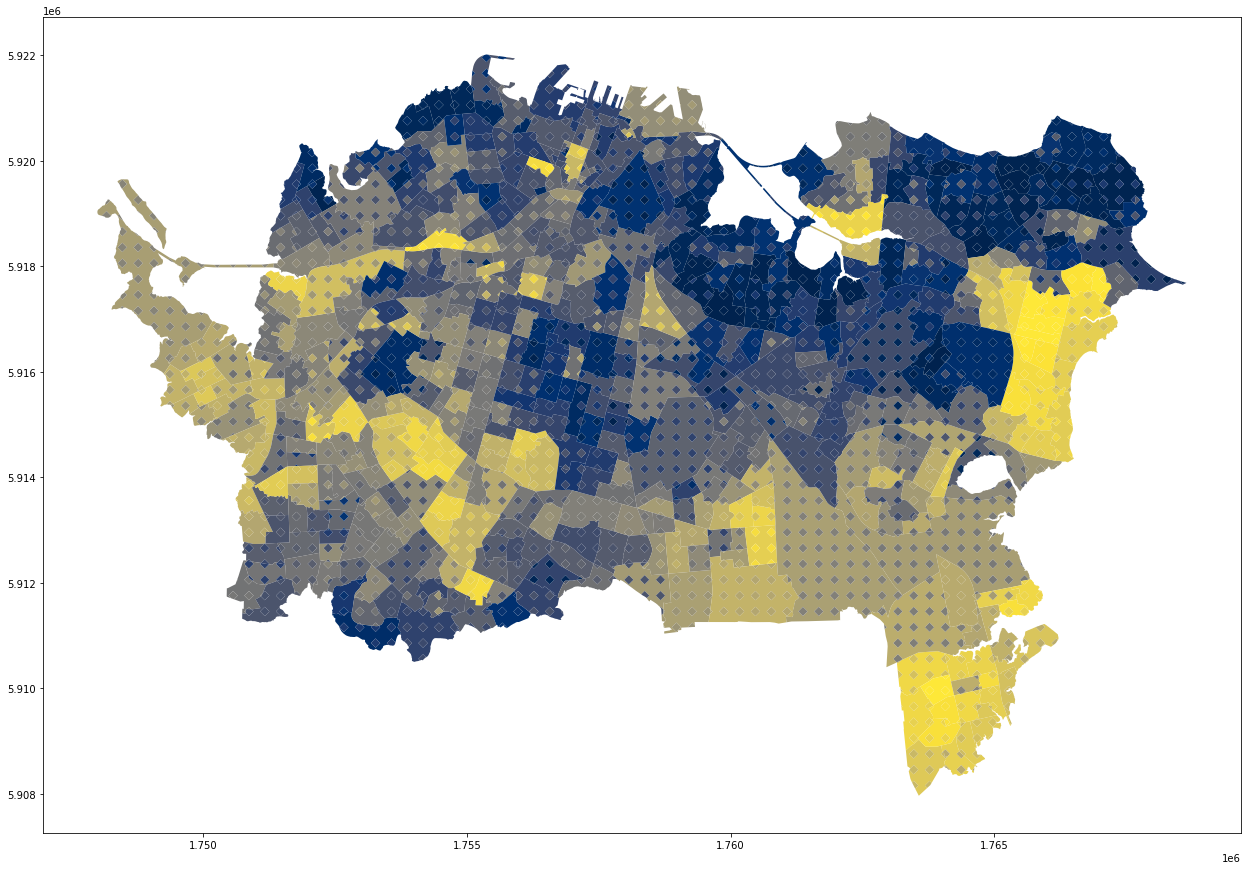

In [8]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)
# ak.plot(ax = ax, facecolor = "#006633", linewidth = 0)

strands = set(t.element_id)
cols = [x for x in t.columns if "Rank" in x]
cmaps = ("cividis", "cividis")

for strand, col, cmap in zip(strands, cols, cmaps):
    t[t.element_id == strand].plot(ax = ax, column = col, cmap = cmap, k = 100, scheme = "equal_interval", linewidth = 0)

Again, this seems to have potential for showing contrast in two variables.